In [ ]:
pip install keras-tuner

In [ ]:
# Importing the packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch

### 1. Problement Statement

                              ANN apply on Class Features to predict the class

### 2.Data Gathering

In [ ]:
df=pd.read_csv('/content/Star_classifications.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.540000e+18,0.0,0.634794,5812.0,56354.0,171.0
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,5.0,119.0,1.180000e+19,0.0,0.779136,10445.0,58158.0,427.0
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,2.0,120.0,5.150000e+18,0.0,0.644195,4576.0,55592.0,299.0
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030000e+19,0.0,0.932346,9149.0,58039.0,775.0
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.890000e+18,0.0,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24373,1.240000e+18,175.349897,61.666536,19.70453,17.93236,17.06251,16.60681,16.25168,2304.0,301.0,2.0,167.0,8.740000e+17,0.0,0.092176,776.0,52319.0,102.0
24374,1.240000e+18,178.033471,35.079444,25.11234,21.91876,20.31964,19.49035,19.15040,4552.0,301.0,4.0,62.0,5.240000e+18,0.0,0.475077,4650.0,55648.0,411.0
24375,1.240000e+18,192.140207,58.891716,25.79230,24.13329,21.40801,20.41338,19.76142,2989.0,301.0,1.0,66.0,9.270000e+18,0.0,0.627644,8235.0,58191.0,37.0
24376,1.240000e+18,21.296481,-4.576998,21.22220,21.19082,20.80462,20.69592,20.80987,7865.0,301.0,4.0,57.0,8.910000e+18,1.0,1.325480,7913.0,57333.0,365.0


In [ ]:
df.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,1
rerun_ID,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24378 entries, 0 to 24377
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       24378 non-null  float64
 1   alpha        24378 non-null  float64
 2   delta        24378 non-null  float64
 3   u            24378 non-null  float64
 4   g            24378 non-null  float64
 5   r            24378 non-null  float64
 6   i            24378 non-null  float64
 7   z            24378 non-null  float64
 8   run_ID       24377 non-null  float64
 9   rerun_ID     24377 non-null  float64
 10  cam_col      24377 non-null  float64
 11  field_ID     24377 non-null  float64
 12  spec_obj_ID  24377 non-null  float64
 13  class        24377 non-null  float64
 14  redshift     24377 non-null  float64
 15  plate        24377 non-null  float64
 16  MJD          24377 non-null  float64
 17  fiber_ID     24377 non-null  float64
dtypes: float64(18)
memory usage: 3.3 MB


<function matplotlib.pyplot.show(close=None, block=None)>

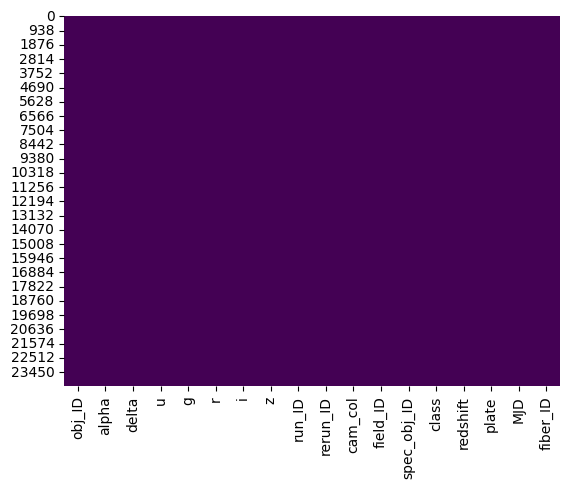

In [ ]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show

In [ ]:
df=df.fillna(0)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.540000e+18,0.0,0.634794,5812.0,56354.0,171.0
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,5.0,119.0,1.180000e+19,0.0,0.779136,10445.0,58158.0,427.0
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,2.0,120.0,5.150000e+18,0.0,0.644195,4576.0,55592.0,299.0
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030000e+19,0.0,0.932346,9149.0,58039.0,775.0
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.890000e+18,0.0,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24373,1.240000e+18,175.349897,61.666536,19.70453,17.93236,17.06251,16.60681,16.25168,2304.0,301.0,2.0,167.0,8.740000e+17,0.0,0.092176,776.0,52319.0,102.0
24374,1.240000e+18,178.033471,35.079444,25.11234,21.91876,20.31964,19.49035,19.15040,4552.0,301.0,4.0,62.0,5.240000e+18,0.0,0.475077,4650.0,55648.0,411.0
24375,1.240000e+18,192.140207,58.891716,25.79230,24.13329,21.40801,20.41338,19.76142,2989.0,301.0,1.0,66.0,9.270000e+18,0.0,0.627644,8235.0,58191.0,37.0
24376,1.240000e+18,21.296481,-4.576998,21.22220,21.19082,20.80462,20.69592,20.80987,7865.0,301.0,4.0,57.0,8.910000e+18,1.0,1.325480,7913.0,57333.0,365.0


### 3. Eda

In [ ]:
df.shape

(24378, 18)

In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24378 entries, 0 to 24377
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       24378 non-null  float64
 1   alpha        24378 non-null  float64
 2   delta        24378 non-null  float64
 3   u            24378 non-null  float64
 4   g            24378 non-null  float64
 5   r            24378 non-null  float64
 6   i            24378 non-null  float64
 7   z            24378 non-null  float64
 8   run_ID       24378 non-null  float64
 9   rerun_ID     24378 non-null  float64
 10  cam_col      24378 non-null  float64
 11  field_ID     24378 non-null  float64
 12  spec_obj_ID  24378 non-null  float64
 13  class        24378 non-null  float64
 14  redshift     24378 non-null  float64
 15  plate        24378 non-null  float64
 16  MJD          24378 non-null  float64
 17  fiber_ID     24378 non-null  float64
dtypes: float64(18)
memory usage: 3.3 MB


<Axes: >

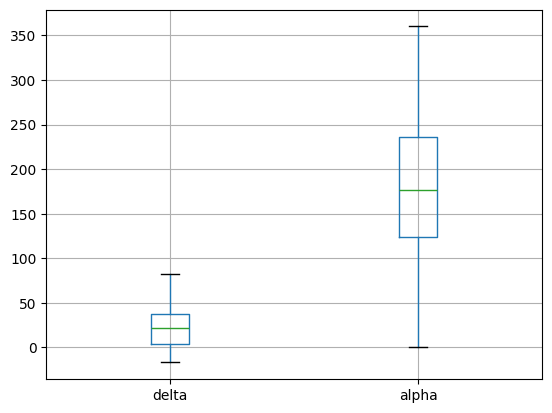

In [ ]:
df[['delta','alpha']].boxplot()

<Axes: >

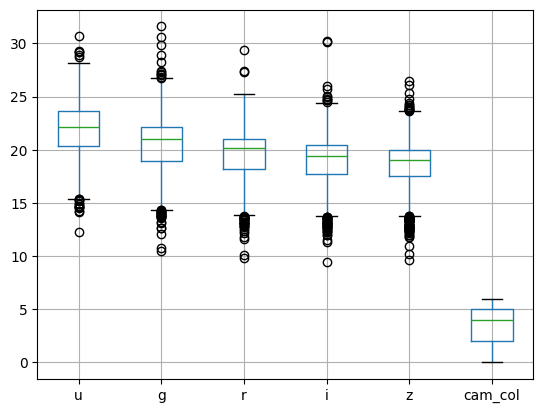

In [ ]:
df[['u','g','r','i','z','cam_col',]].boxplot()

<Axes: >

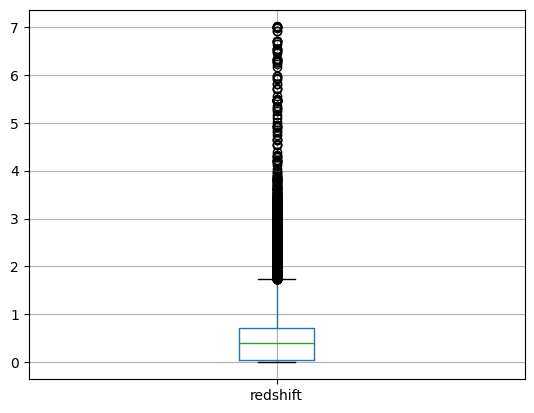

In [ ]:
df[['redshift']].boxplot()

<Axes: >

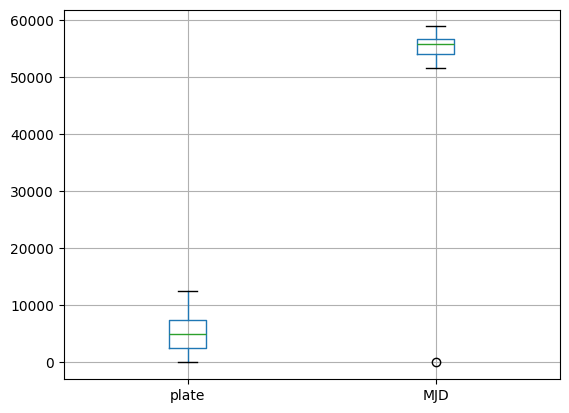

In [ ]:
df[['plate','MJD']].boxplot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24378 entries, 0 to 24377
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       24378 non-null  float64
 1   alpha        24378 non-null  float64
 2   delta        24378 non-null  float64
 3   u            24378 non-null  float64
 4   g            24378 non-null  float64
 5   r            24378 non-null  float64
 6   i            24378 non-null  float64
 7   z            24378 non-null  float64
 8   run_ID       24378 non-null  float64
 9   rerun_ID     24378 non-null  float64
 10  cam_col      24378 non-null  float64
 11  field_ID     24378 non-null  float64
 12  spec_obj_ID  24378 non-null  float64
 13  class        24378 non-null  float64
 14  redshift     24378 non-null  float64
 15  plate        24378 non-null  float64
 16  MJD          24378 non-null  float64
 17  fiber_ID     24378 non-null  float64
dtypes: float64(18)
memory usage: 3.3 MB


### Train Test Split

In [ ]:
df=df.drop('obj_ID', axis=1)
df=df.drop('run_ID', axis=1)
df=df.drop('rerun_ID', axis=1)
df=df.drop('field_ID', axis=1)
df=df.drop('spec_obj_ID', axis=1)
df=df.drop('fiber_ID', axis=1)

df

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2.0,0.0,0.634794,5812.0,56354.0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5.0,0.0,0.779136,10445.0,58158.0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2.0,0.0,0.644195,4576.0,55592.0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3.0,0.0,0.932346,9149.0,58039.0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3.0,0.0,0.116123,6121.0,56187.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24373,175.349897,61.666536,19.70453,17.93236,17.06251,16.60681,16.25168,2.0,0.0,0.092176,776.0,52319.0
24374,178.033471,35.079444,25.11234,21.91876,20.31964,19.49035,19.15040,4.0,0.0,0.475077,4650.0,55648.0
24375,192.140207,58.891716,25.79230,24.13329,21.40801,20.41338,19.76142,1.0,0.0,0.627644,8235.0,58191.0
24376,21.296481,-4.576998,21.22220,21.19082,20.80462,20.69592,20.80987,4.0,1.0,1.325480,7913.0,57333.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24378 entries, 0 to 24377
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     24378 non-null  float64
 1   delta     24378 non-null  float64
 2   u         24378 non-null  float64
 3   g         24378 non-null  float64
 4   r         24378 non-null  float64
 5   i         24378 non-null  float64
 6   z         24378 non-null  float64
 7   cam_col   24378 non-null  float64
 8   class     24378 non-null  float64
 9   redshift  24378 non-null  float64
 10  plate     24378 non-null  float64
 11  MJD       24378 non-null  float64
dtypes: float64(12)
memory usage: 2.2 MB


In [ ]:
# Splitting the data
X = df.drop('class',axis = 1)
Y = df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=64, stratify = Y )

In [ ]:
# Normalizing the data
normalizer = MinMaxScaler()

X_train_scaled = pd.DataFrame(normalizer.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(normalizer.transform(X_test), columns = X_test.columns)

#Buiding the Neural Networks

In [ ]:
strategy = tf.distribute.MultiWorkerMirroredStrategy()

In [ ]:
#---------------------------Generating the Basic Structure of Neural Network---------------------------
with strategy.scope():
  model = tf.keras.Sequential()

  # Adding the input layer
  model.add(tf.keras.layers.Input(shape = (11,)))

  # Adding the hidden layers
  # hidden layer 1
  model.add(tf.keras.layers.Dense(units = 130,
                                activation = 'relu',
                                kernel_initializer = 'he_normal'))

  # hidden layer 2
  model.add(tf.keras.layers.Dense(units = 70,
                                activation = 'relu',
                                kernel_initializer = 'he_uniform'))
  # hidden layer 3
  model.add(tf.keras.layers.Dense(units = 30,
                                activation = 'relu',
                                kernel_initializer = 'he_uniform'))




  # Adding the output layer
  model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'softmax',
                                kernel_initializer = 'glorot_uniform'))

  #---------------------------compiling the model---------------------------
  model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy','Precision','Recall'])



In [ ]:
# Summarizing the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 130)                 │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 70)                  │           9,170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           2,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,891 (50.36 KB)

 Trainable params: 12,891 (50.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
hist_obj = model.fit(x = X_train_scaled,
                     y = Y_train,
                     batch_size = 100,
                     epochs = 100,
                     validation_data = (X_test_scaled, Y_test),
                     validation_batch_size = 50)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - Precision: 0.4226 - Recall: 1.0000 - accuracy: 0.2037 - loss: 0.0000e+00 - val_Precision: 0.4223 - val_Recall: 1.0000 - val_accuracy: 0.2006 - val_loss: 0.0000e+00
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Precision: 0.4217 - Recall: 1.0000 - accuracy: 0.2011 - loss: 0.0000e+00 - val_Precision: 0.4223 - val_Recall: 1.0000 - val_accuracy: 0.2006 - val_loss: 0.0000e+00
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Precision: 0.4219 - Recall: 1.0000 - accuracy: 0.2023 - loss: 0.0000e+00 - val_Precision: 0.4223 - val_Recall: 1.0000 - val_accuracy: 0.2006 - val_loss: 0.0000e+00
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Precision: 0.4198 - Recall: 1.0000 - accuracy: 0.2001 - loss: 0.0000e+00 - val_Precision: 0.4223 - val_Recall: 1.0000 - val_accuracy: 0.2006 - val_loss: 0.0000e+00
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Precision: 0.4234 - Recall: 1.0000 - accuracy: 0.2002 - loss: 0.0000

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 130)                 │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 70)                  │           9,170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           2,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,675 (151.08 KB)

 Trainable params: 12,891 (50.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,784 (100.72 KB)

In [ ]:
# Fetching the required data from history object
def visualizer(hist_obj, parameter):
  plt.figure(figsize = (24,10))
  train_param = hist_obj.history.get(parameter)
  val_param = hist_obj.history.get(f'val_{parameter}')
  epochs = hist_obj.epoch

  sns.lineplot(x = epochs , y = train_param)
  sns.lineplot(x = epochs, y = val_param)

  plt.legend(labels = [parameter, f'val_{parameter}'])
  plt.xticks(ticks = epochs, labels = epochs, rotation = 90)
  plt.yticks(ticks = [i/100 for i in range(10,110,10)], labels = [i/100 for i in range(10,110,10)])

  plt.show()


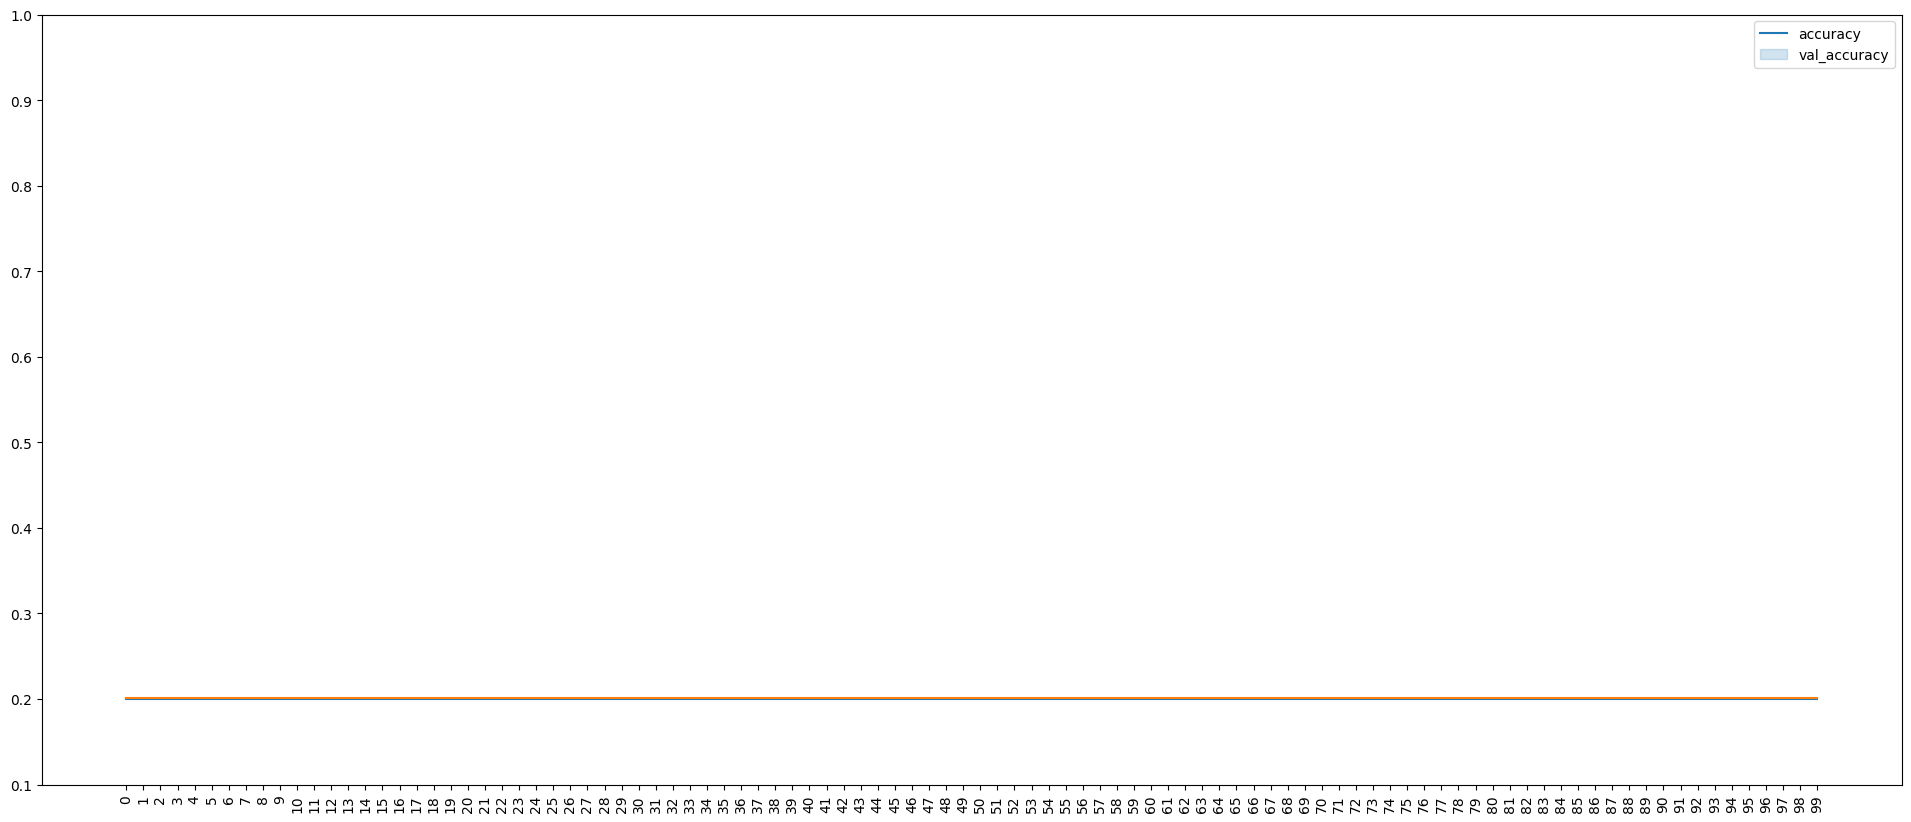

In [ ]:
visualizer(hist_obj, 'accuracy')

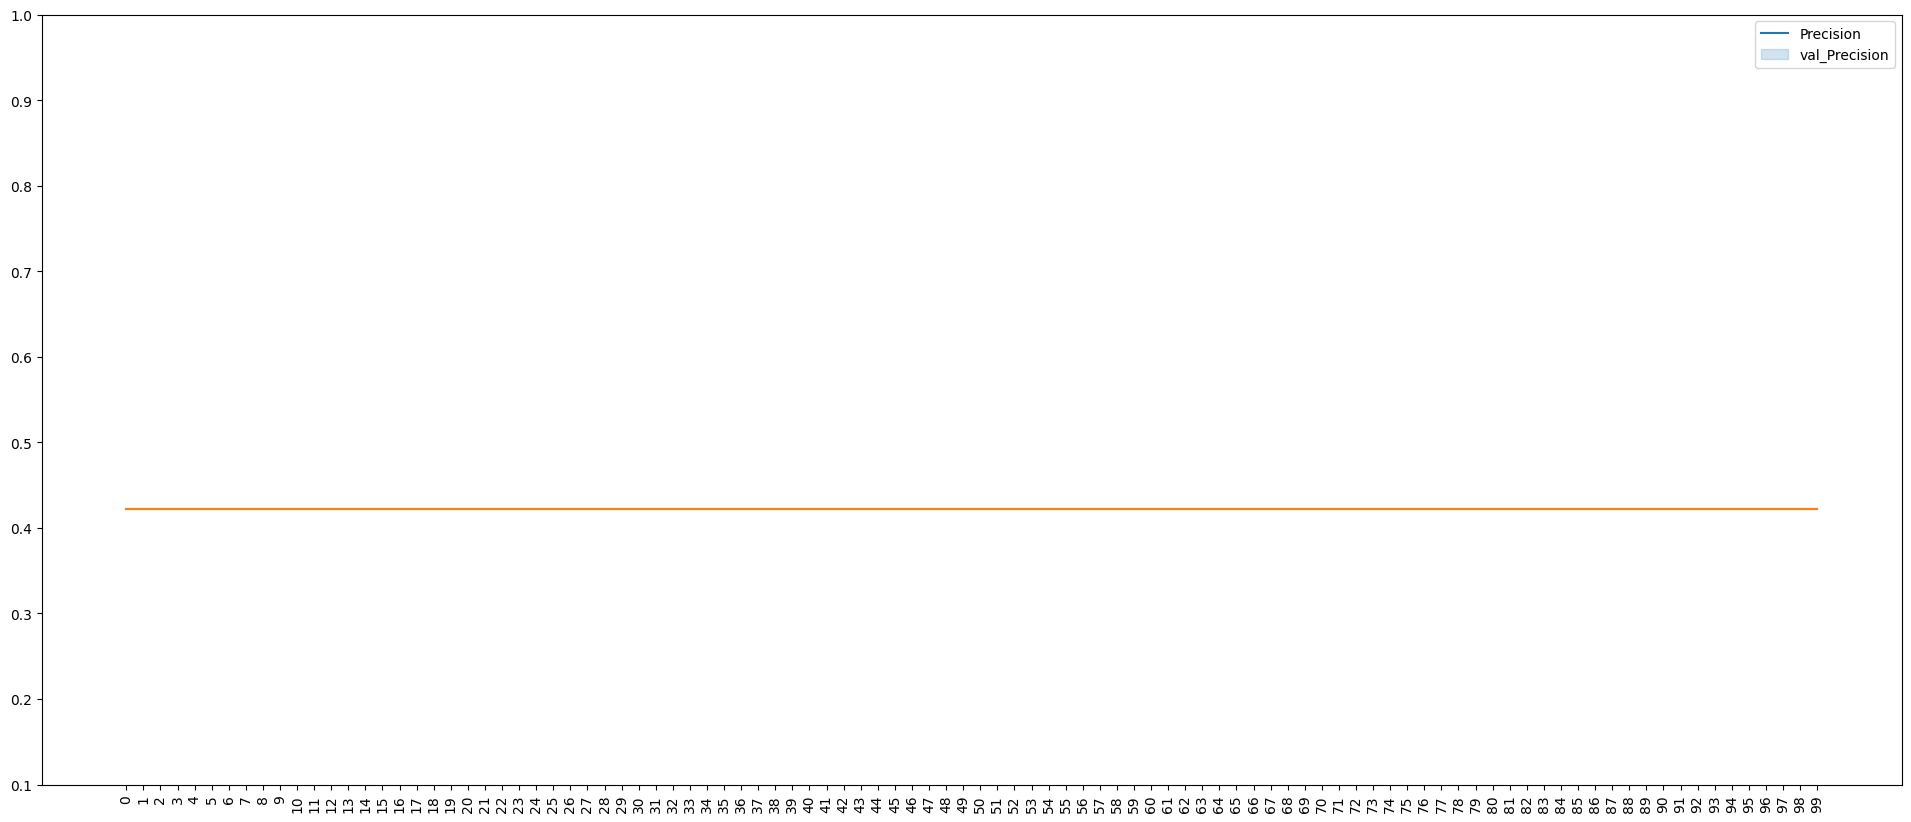

In [ ]:
visualizer(hist_obj, 'Precision')

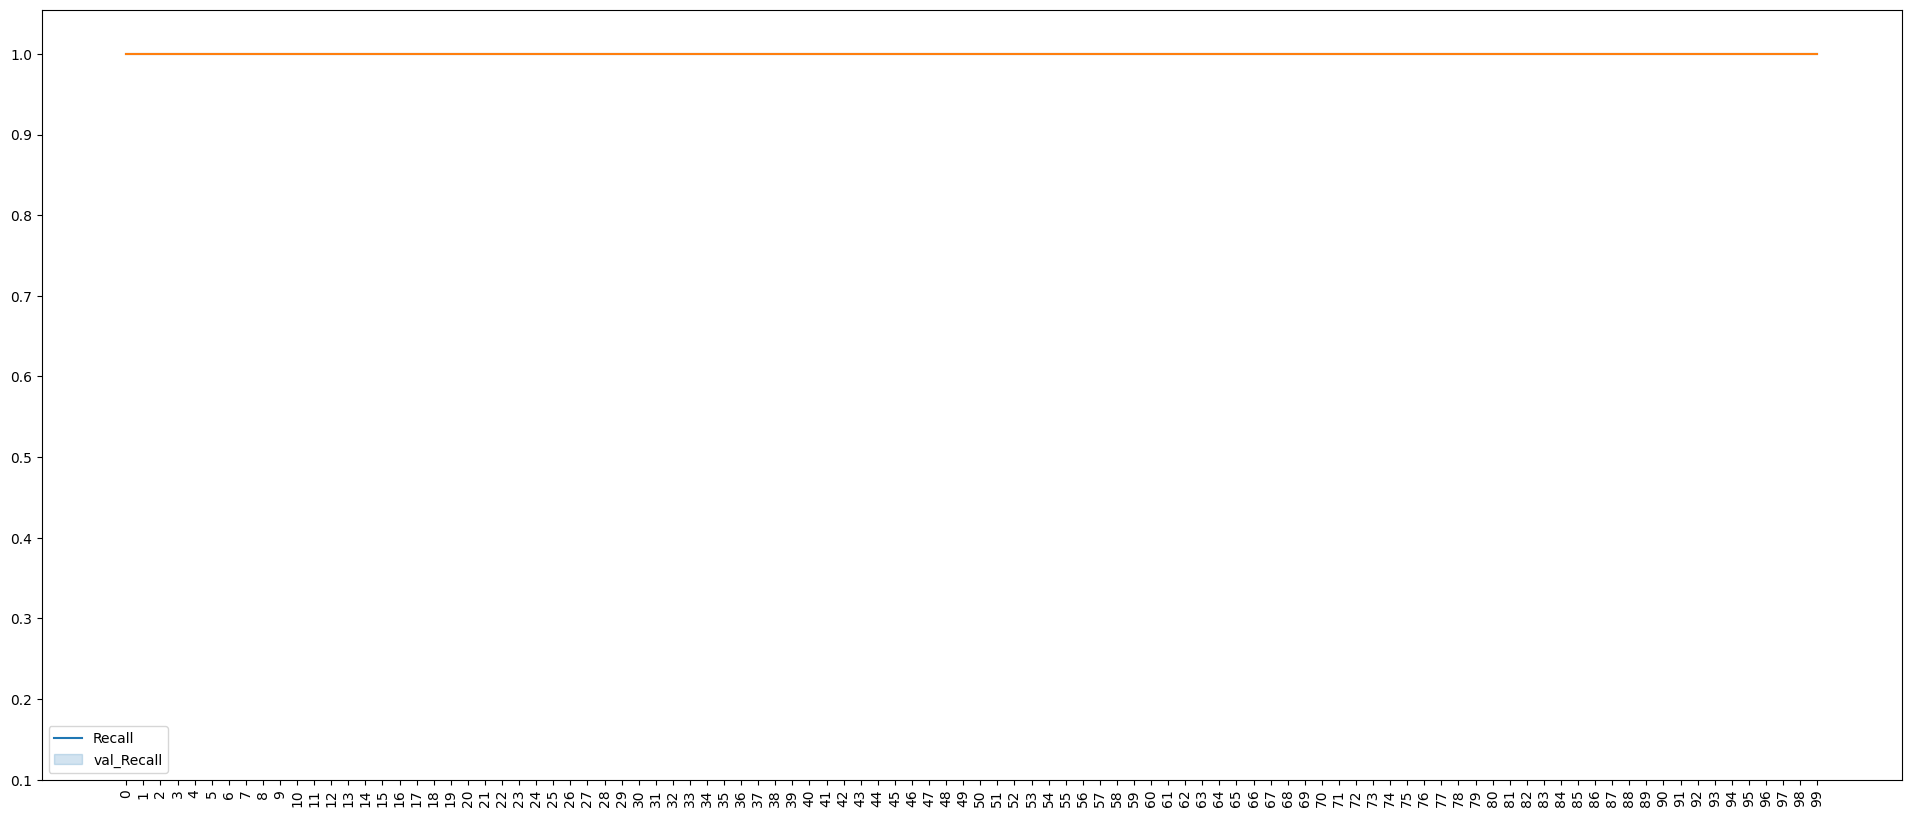

In [ ]:
visualizer(hist_obj, 'Recall')